In [1]:
%matplotlib inline
from clustering import kmeans_find_clusters, DBSCAN, WPGMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import Phylo
from collections import Counter
from sklearn.metrics import confusion_matrix

In [2]:
# reading data
blobs = pd.read_csv('../data/blobs.csv')
cancer = pd.read_csv('../data/cancer.csv')

# Agglomerative

##### I use a method from old HW

In [3]:
with open('tree.txt', 'w') as f:
    f.write(WPGMA(blobs).linkage)

In [4]:
tree = Phylo.read('tree.txt', format='newick')

<Figure size 432x288 with 0 Axes>

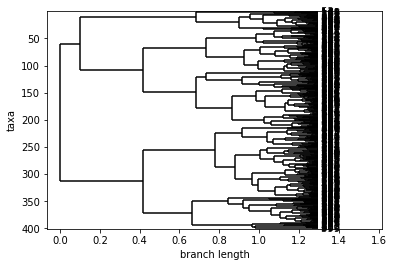

In [5]:
plt.figure()
ax = Phylo.draw(tree)

In [6]:
cluster1 = []
for clade in tree.clade.clades[0].get_terminals():
    cluster1.append(int(clade.name))
    
cluster2 = []
for clade in tree.clade.clades[1].get_terminals():
    cluster2.append(int(clade.name))
    

In [7]:
blobs['colour_ac'] = -1
blobs.loc[cluster1, 'colour_ac'] = 1
blobs.loc[cluster2, 'colour_ac'] = 0

Text(0.5, 1.0, '2 clusters')

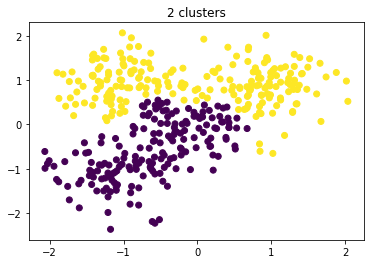

In [8]:
plt.scatter(blobs.X, blobs.Y, c=blobs.colour_ac)
plt.title('2 clusters')

In [9]:
cluster1 = []
for clade in tree.clade.clades[0].clades[0].get_terminals():
    cluster1.append(int(clade.name))
    
cluster0 = []
for clade in tree.clade.clades[0].clades[1].get_terminals():
    cluster0.append(int(clade.name))
    
cluster2 = []
for clade in tree.clade.clades[1].get_terminals():
    cluster2.append(int(clade.name))



In [10]:
blobs['colour_ac'] = -1
blobs.loc[cluster1, 'colour_ac'] = 1
blobs.loc[cluster0, 'colour_ac'] = 2
blobs.loc[cluster2, 'colour_ac'] = 0

Text(0.5, 1.0, '3 clusters')

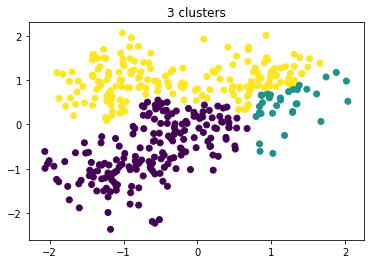

In [11]:
plt.scatter(blobs.X, blobs.Y, c=blobs.colour_ac)
plt.title('3 clusters')

In [12]:
cluster0 = []
for clade in tree.clade.clades[0].clades[0].get_terminals():
    cluster0.append(int(clade.name))
    
cluster1 = []
for clade in tree.clade.clades[0].clades[1].clades[0].get_terminals():
    cluster1.append(int(clade.name))
    
cluster2 = []
for clade in tree.clade.clades[0].clades[1].clades[1].get_terminals():
    cluster2.append(int(clade.name))    

cluster3 = []
for clade in tree.clade.clades[1].clades[0].get_terminals():
    cluster3.append(int(clade.name))

cluster4 = []
for clade in tree.clade.clades[1].clades[1].get_terminals():
    cluster4.append(int(clade.name))

In [13]:
blobs['colour_ac'] = -1
blobs.loc[cluster1, 'colour_ac'] = 1
blobs.loc[cluster0, 'colour_ac'] = 0
blobs.loc[cluster2, 'colour_ac'] = 2
blobs.loc[cluster3, 'colour_ac'] = 3
blobs.loc[cluster4, 'colour_ac'] = 4

Text(0.5, 1.0, '5 clusters')

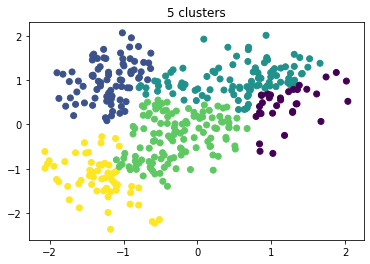

In [14]:
plt.scatter(blobs.X, blobs.Y, c=blobs.colour_ac)
plt.title('5 clusters')

In [15]:
blobs = blobs[['X', 'Y']]

# DBSCAN

In [16]:
for distance in np.linspace(1.5, 3, 29):
    for count in range(150, 200):
        db = DBSCAN(blobs, distance, count)
        db.cluster()
        if db.clusters == 4:
            break
        print(distance, count, db.clusters)
    if db.clusters == 4:
        break

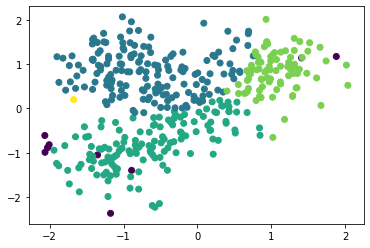

In [17]:
plt.scatter(db.data.X, db.data.Y, c=db.data.cluster)

In [18]:
db.data.loc[db.data.cluster == 1].shape

(165, 4)

# k-means

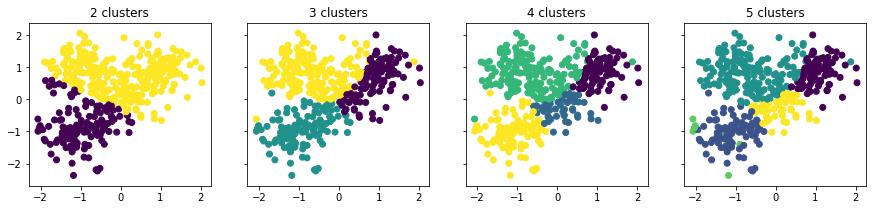

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
for i, clusters in enumerate([2, 3, 4, 5]):
    centers, labels = kmeans_find_clusters(blobs.values, clusters)
    blobs['colour'] = labels
    axs[i].scatter(blobs.X, blobs.Y, c=blobs.colour)
    axs[i].set_title(f'{clusters} clusters')

# Cancer k-means

In [20]:
def purity(cm):
    return cm.max(axis=1).sum() / cm.sum()

In [21]:
for clusters in range(2, 11):
    centers, labels = kmeans_find_clusters(cancer.drop(['label'], axis=1).values, clusters)
    cm = confusion_matrix(cancer.label.apply(lambda x: 1 if x == 'M' else 0), labels).T
    print(f'{clusters} clusters: purity = {purity(cm)}')

2 clusters: purity = 0.8541300527240774
3 clusters: purity = 0.8875219683655536
4 clusters: purity = 0.8347978910369068
5 clusters: purity = 0.8910369068541301
6 clusters: purity = 0.8769771528998243
7 clusters: purity = 0.8910369068541301
8 clusters: purity = 0.8910369068541301
9 clusters: purity = 0.9068541300527241
10 clusters: purity = 0.9103690685413005
